In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

In [3]:
X = X / 255.0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1428, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
svm_model.fit(X_train, y_train)


SVC(C=10, gamma=0.01)

In [7]:
y_pred = svm_model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 85.95%


In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 874    0  103    1    0    1    2    0    1    1]
 [   0 1124   18    2    1    0    0    3    3    1]
 [   0    3  958    0    1    0    0    1    4    0]
 [   0    0  229  793    0    3    0    2    2    3]
 [   0    0  132    0  764    0    2    0    0    8]
 [   1    0  155    9    2  766    4    0    0    0]
 [   0    0  158    0    3    5  794    0    1    0]
 [   0    2  198    0    3    0    0  843    0    9]
 [   0    1  156   10    2    5    1    2  788    2]
 [   6    2  106   10    6    1    0   12    5  888]]


In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       983
           1       0.99      0.98      0.98      1152
           2       0.43      0.99      0.60       967
           3       0.96      0.77      0.85      1032
           4       0.98      0.84      0.91       906
           5       0.98      0.82      0.89       937
           6       0.99      0.83      0.90       961
           7       0.98      0.80      0.88      1055
           8       0.98      0.81      0.89       967
           9       0.97      0.86      0.91      1036

    accuracy                           0.86      9996
   macro avg       0.93      0.86      0.88      9996
weighted avg       0.93      0.86      0.88      9996



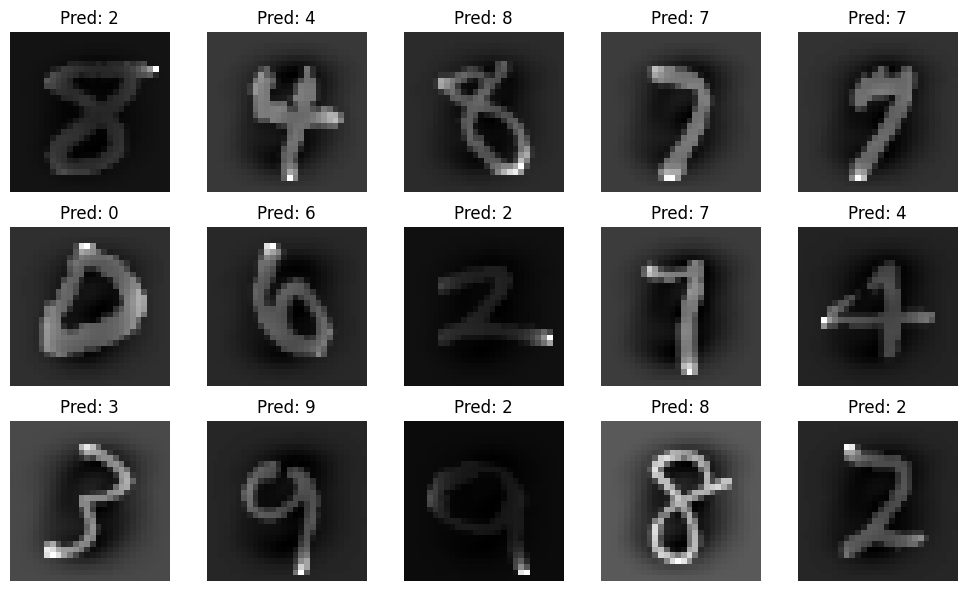

In [11]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()

for i in range(15):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Pred: {y_pred[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()